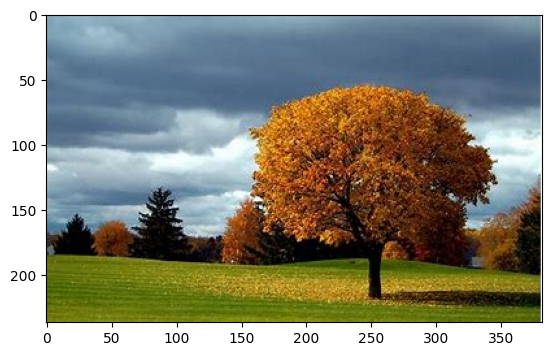

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tree = cv2.imread('Data\Tree.jpeg')
tree = cv2.cvtColor(tree, cv2.COLOR_BGR2RGB)
plt.imshow(tree)

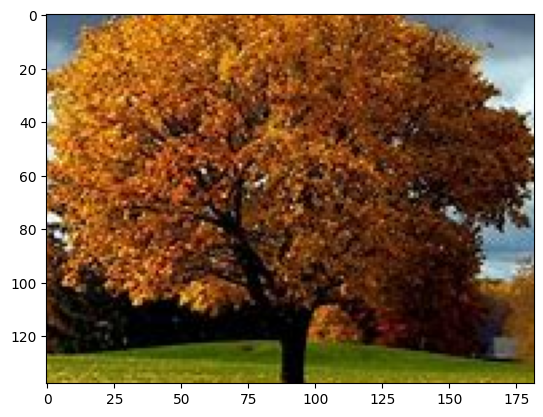

In [20]:
template = cv2.imread('Data/TreeTemplate.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
plt.imshow(template)

In [21]:
print(tree.shape, " & ", template.shape)

(237, 382, 3)  &  (138, 182, 3)


Evaluate Method

In [8]:
myfunc = eval('sum')
myfunc([1,2,3,4])

10

Refer: https://docs.opencv.org/3.4/d4/dc6/tutorial_py_template_matching.html

Consider a method and check how it works

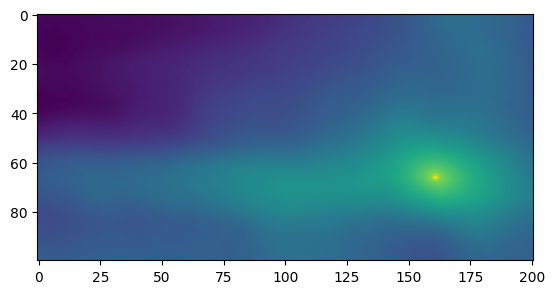

In [22]:
meth_CCOEFF = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(tree, template, meth_CCOEFF)
plt.imshow(res)

It highlights at the location where match could be possible.

In [14]:
#All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

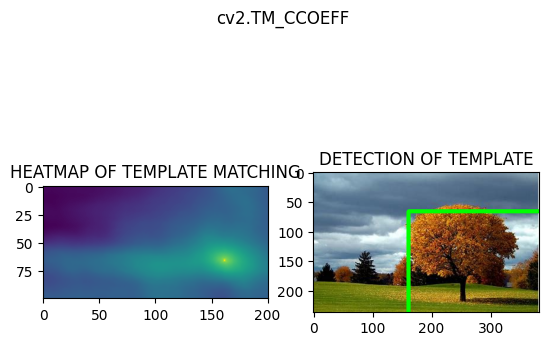

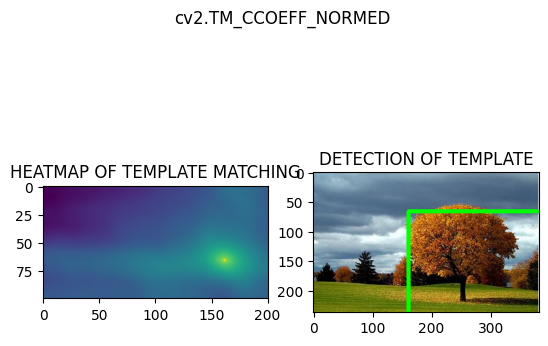

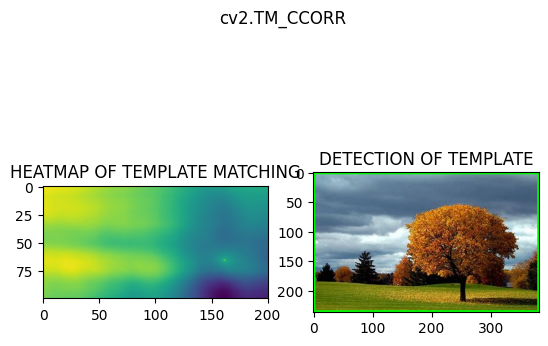

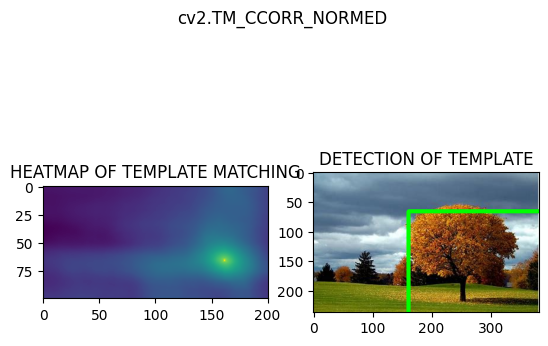

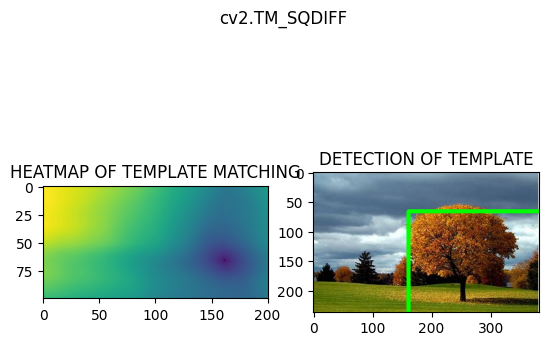

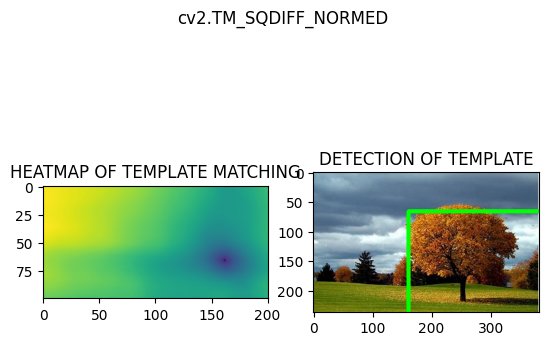

In [25]:
for m in methods:
    # Create A COPY
    treeCopy = tree.copy() # for identification by drawing rectangle on the image
    
    method = eval(m)
    
    # Template Matching
    res = cv2.matchTemplate(treeCopy, template, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc  # (x,y)
    else:
        top_left = max_loc
        
    height, width, channels = tree.shape    
    bottom_right = (top_left[0]+width, top_left[1]+height)    
    cv2.rectangle(treeCopy, top_left, bottom_right, (0,255,0), 5)
    
    # Plot and show the images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(treeCopy)
    plt.title('DETECTION OF TEMPLATE')
    
    # Title with the method used
    plt.suptitle(m)
    plt.show()
    print('\n')    